In [17]:
# import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load the data

data = pd.read_csv("iris.csv")
data.drop("Id", axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
mapings = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
mapings

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [5]:
# replace the independent variable

data['Species']= data['Species'].map(mapings)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Importing data from sklearn.datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# seems data is equally distributed

data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [ ]:
# Divide the data in X and Y

#scalar = StandardScaler()
#X = scalar.fit_transform(data.iloc[:,:-1])
#Y = data.iloc[:,-1]

In [36]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [37]:
# Splitting the data in testing and training set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

### Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [56]:
# fitting basic DecicionTree model on our dataset

decisiontree = DecisionTreeClassifier()
model_dc = decisiontree.fit(X_train,y_train)

# prediction
y_pred = model_dc.predict(X_test)
y_train_pred = model_dc.predict(X_train)

In [57]:
# calculating Accuracy

print(f"Accuracy on testing set : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy on training set : {accuracy_score(y_train, y_train_pred)}")

Accuracy on testing set : 0.9666666666666667
Accuracy on training set : 1.0


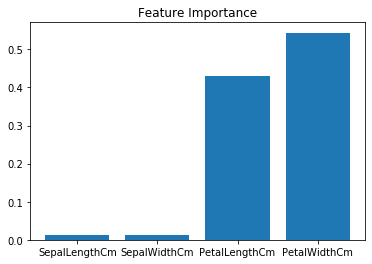

In [73]:
# Feature importance

plt.bar(X_train.columns, model_dc.feature_importances_)
plt.title("Feature Importance")
plt.show()

In [77]:
# Using grid search CV we can also find the best params in order to increase the acuuracy
# we haave already achieved accurracy of 96% on our testing dataset.
# below steps are for reference which can be also applied for other datasets.

param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':range(5,100)
}

In [78]:
dt = DecisionTreeClassifier()
gs_inst = GridSearchCV(dt, param_grid = param_grid, cv = 5)

In [79]:
gs_inst.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 100)},
             pre_dispat

In [80]:
gs_inst.best_params_

{'criterion': 'gini', 'max_depth': 33}

In [81]:
# prediction
y_pred = gs_inst.predict(X_test)
y_train_pred = gs_inst.predict(X_train)

print(f"Accuracy on testing set : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy on training set : {accuracy_score(y_train, y_train_pred)}")

Accuracy on testing set : 0.9666666666666667
Accuracy on training set : 1.0


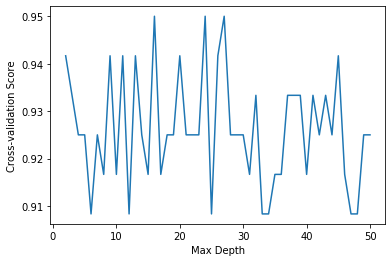

In [74]:
dtc = DecisionTreeClassifier()
max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)
plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score");

In [83]:
clf3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4).fit(X_train, y_train)

# prediction
y_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)

print(f"Accuracy on testing set : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy on training set : {accuracy_score(y_train, y_train_pred)}")

Accuracy on testing set : 0.9
Accuracy on training set : 0.9833333333333333


In [129]:
# Install required libraries
#!pip install pydotplus
#!pip install graphviz

In [133]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())


# the last command is not working in my machine due to some dependecies issues.

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
random_forest = RandomForestClassifier(oob_score=True)
model_rm = random_forest.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [104]:
# prediction
y_pred = model_rm.predict(X_test)
y_train_pred = model_rm.predict(X_train)

print(f"Accuracy on testing set : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy on training set : {accuracy_score(y_train, y_train_pred)}")

Accuracy on testing set : 0.9666666666666667
Accuracy on training set : 1.0


In [105]:
# OOB score

print(random_forest.oob_score_)

0.925


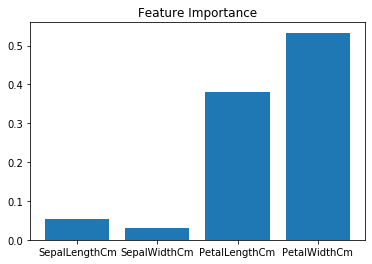

In [106]:
# Feature importance

plt.bar(X_train.columns, model_rm.feature_importances_)
plt.title("Feature Importance")
plt.show()

In [107]:
# we can also use RandomizedSearchCV and GridSearchCV in order to find best params for getting more desired outputs
# but here as our model performing well on traning data as well in testing data we will not use above 2 methods.

### SVM

In [122]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [114]:
# fitting basic SVM Model

svm_inst = SVC()
model_svm = svm_inst.fit(X_train,y_train)

# prediction
y_pred = model_svm.predict(X_test)
y_train_pred = model_svm.predict(X_train)

print(f"Accuracy on testing set : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy on training set : {accuracy_score(y_train, y_train_pred)}")

Accuracy on testing set : 0.9666666666666667
Accuracy on training set : 0.9916666666666667


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [119]:
# creating a pipeline

svm_est = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf'))])

In [120]:
# mention the parameters which will be used in order to find the best params for our model to get trained on 

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

In [123]:
# A parameter grid is a dictionary with the parameter setting you would like to try

param_grid = dict(svc__gamma = gammas, svc__C = Cs)

In [124]:
# using StratifiedShuffleSplit and GridSearchCV finding best params

cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)

grid_cv = GridSearchCV(svm_est, param_grid = param_grid, cv = cv)
grid_cv.fit(X_train,grid_cv y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=10, test_size=0.2,
            train_size=None),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None

In [126]:
# best params

grid_cv.best_params_

{'svc__C': 10, 'svc__gamma': 1}

In [125]:
# fitting model with best params and calculating accuraacy on both traning ans testing set.

model_svm = grid_cv.fit(X_train,y_train)

# prediction
y_pred = grid_cv.predict(X_test)
y_train_pred = grid_cv.predict(X_train)

print(f"Accuracy on testing set : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy on training set : {accuracy_score(y_train, y_train_pred)}")

Accuracy on testing set : 0.9
Accuracy on training set : 0.9916666666666667
